<a href="https://colab.research.google.com/github/AndreHucke/gen_ai/blob/main/Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----
# Turn on the GPU:

Runtime -> Change runtime type > Select GPU. Options: <select>
  <option value="cpu">CPU</option>
  <option value="t4" selected>T4 GPU</option>
  <option value="l4">L4 GPU</option>
  <option value="a100">A100 GPU</option>
  <option value="h100">H100 GPU</option>
</select>

At first, I've selected the T4 because it is the lower end of GPU. I don't think I'll need the extra speed/RAM of the other GPUs offered. But while running the testing of different architectures, I realised that I little more power from the A100 would be good.

The GPUs are great at parallelized computation, so it speeds up the training by a lot.

(Commented out so I can restart and run all without having to download the dataset again)

----

In [3]:
# import kagglehub
# import os
# import shutil

# # Download the dataset
# path = kagglehub.dataset_download("ipythonx/mvtec-ad")
# print("Path to dataset files:", path)

# # Good examples:
# # transistor/train/good/
# transistor_good_path = os.path.join(path, 'transistor', 'train', 'good')

In [4]:
from google.colab import drive
import os
drive.mount('/content/drive')

# Define your destination in Drive
drive_dest = '/content/drive/MyDrive/transistor_good_examples'
os.makedirs(drive_dest, exist_ok=True)

# Copy the files from the temporary Colab storage to your Drive
# for file_name in os.listdir(transistor_good_path):
#     source = os.path.join(transistor_good_path, file_name)
#     destination = os.path.join(drive_dest, file_name)
#     shutil.copy(source, destination)

# print(f"Successfully uploaded files to: {drive_dest}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

# List all files in the Drive directory
file_names = os.listdir(drive_dest)
# Create full paths
full_paths = [os.path.join(drive_dest, f) for f in file_names]

# Create the Dataframe
df = pd.DataFrame({
    'file_name': file_names,
    'path': full_paths
})

# Display the df
df

file_name                                               path
0     011.png  /content/drive/MyDrive/transistor_good_example...
1     171.png  /content/drive/MyDrive/transistor_good_example...
2     201.png  /content/drive/MyDrive/transistor_good_example...
3     137.png  /content/drive/MyDrive/transistor_good_example...
4     106.png  /content/drive/MyDrive/transistor_good_example...
..        ...                                                ...
208   149.png  /content/drive/MyDrive/transistor_good_example...
209   143.png  /content/drive/MyDrive/transistor_good_example...
210   147.png  /content/drive/MyDrive/transistor_good_example...
211   123.png  /content/drive/MyDrive/transistor_good_example...
212   095.png  /content/drive/MyDrive/transistor_good_example...

[213 rows x 2 columns]

In [6]:
import psutil

# Get memory statistics
memory = psutil.virtual_memory()
total_ram = memory.total / (1024**3)  # Convert to GB
available_ram = memory.available / (1024**3)

print(f"Total RAM: {total_ram:.2f} GB")
print(f"Available RAM: {available_ram:.2f} GB")

Total RAM: 83.47 GB
Available RAM: 81.36 GB


In [7]:
from PIL import Image
import numpy as np

def get_image_metadata(path):
    with Image.open(path) as img:
        width, height = img.size
        # Channels: 'RGB' is 3, 'L' (grayscale) is 1, 'RGBA' is 4
        channels = len(img.getbands())
        # Data type (most MVTec images are uint8)
        dtype = str(np.array(img).dtype)
    return height, width, channels, dtype

# Apply the function to the existing dataframe 'df'
# This creates a tuple of metadata for each row
metadata = df['path'].apply(get_image_metadata)

# Unpack the tuples into separate columns
df[['height', 'width', 'channels', 'dtype']] = pd.DataFrame(metadata.tolist(), index=df.index)

# Display updated dataframe
df

file_name                                               path  height  \
0     011.png  /content/drive/MyDrive/transistor_good_example...    1024   
1     171.png  /content/drive/MyDrive/transistor_good_example...    1024   
2     201.png  /content/drive/MyDrive/transistor_good_example...    1024   
3     137.png  /content/drive/MyDrive/transistor_good_example...    1024   
4     106.png  /content/drive/MyDrive/transistor_good_example...    1024   
..        ...                                                ...     ...   
208   149.png  /content/drive/MyDrive/transistor_good_example...    1024   
209   143.png  /content/drive/MyDrive/transistor_good_example...    1024   
210   147.png  /content/drive/MyDrive/transistor_good_example...    1024   
211   123.png  /content/drive/MyDrive/transistor_good_example...    1024   
212   095.png  /content/drive/MyDrive/transistor_good_example...    1024   

     width  channels  dtype  
0     1024         3  uint8  
1     1024         3  uint8  
2     1024         3  uint8  
3     1024         3  uint8  
4     1024         3  uint8  
..     ...       ...    ...  
208   1024         3  uint8  
209   1024         3  uint8  
210   1024         3  uint8  
211   1024         3  uint8  
212   1024         3  uint8  

[213 rows x 6 columns]

In [8]:
# Reprint the RAM usage
memory = psutil.virtual_memory()
total_ram = memory.total / (1024**3)  # Convert to GB
available_ram = memory.available / (1024**3)

print(f"Total RAM: {total_ram:.2f} GB")
print(f"Available RAM: {available_ram:.2f} GB")

Total RAM: 83.47 GB
Available RAM: 81.33 GB


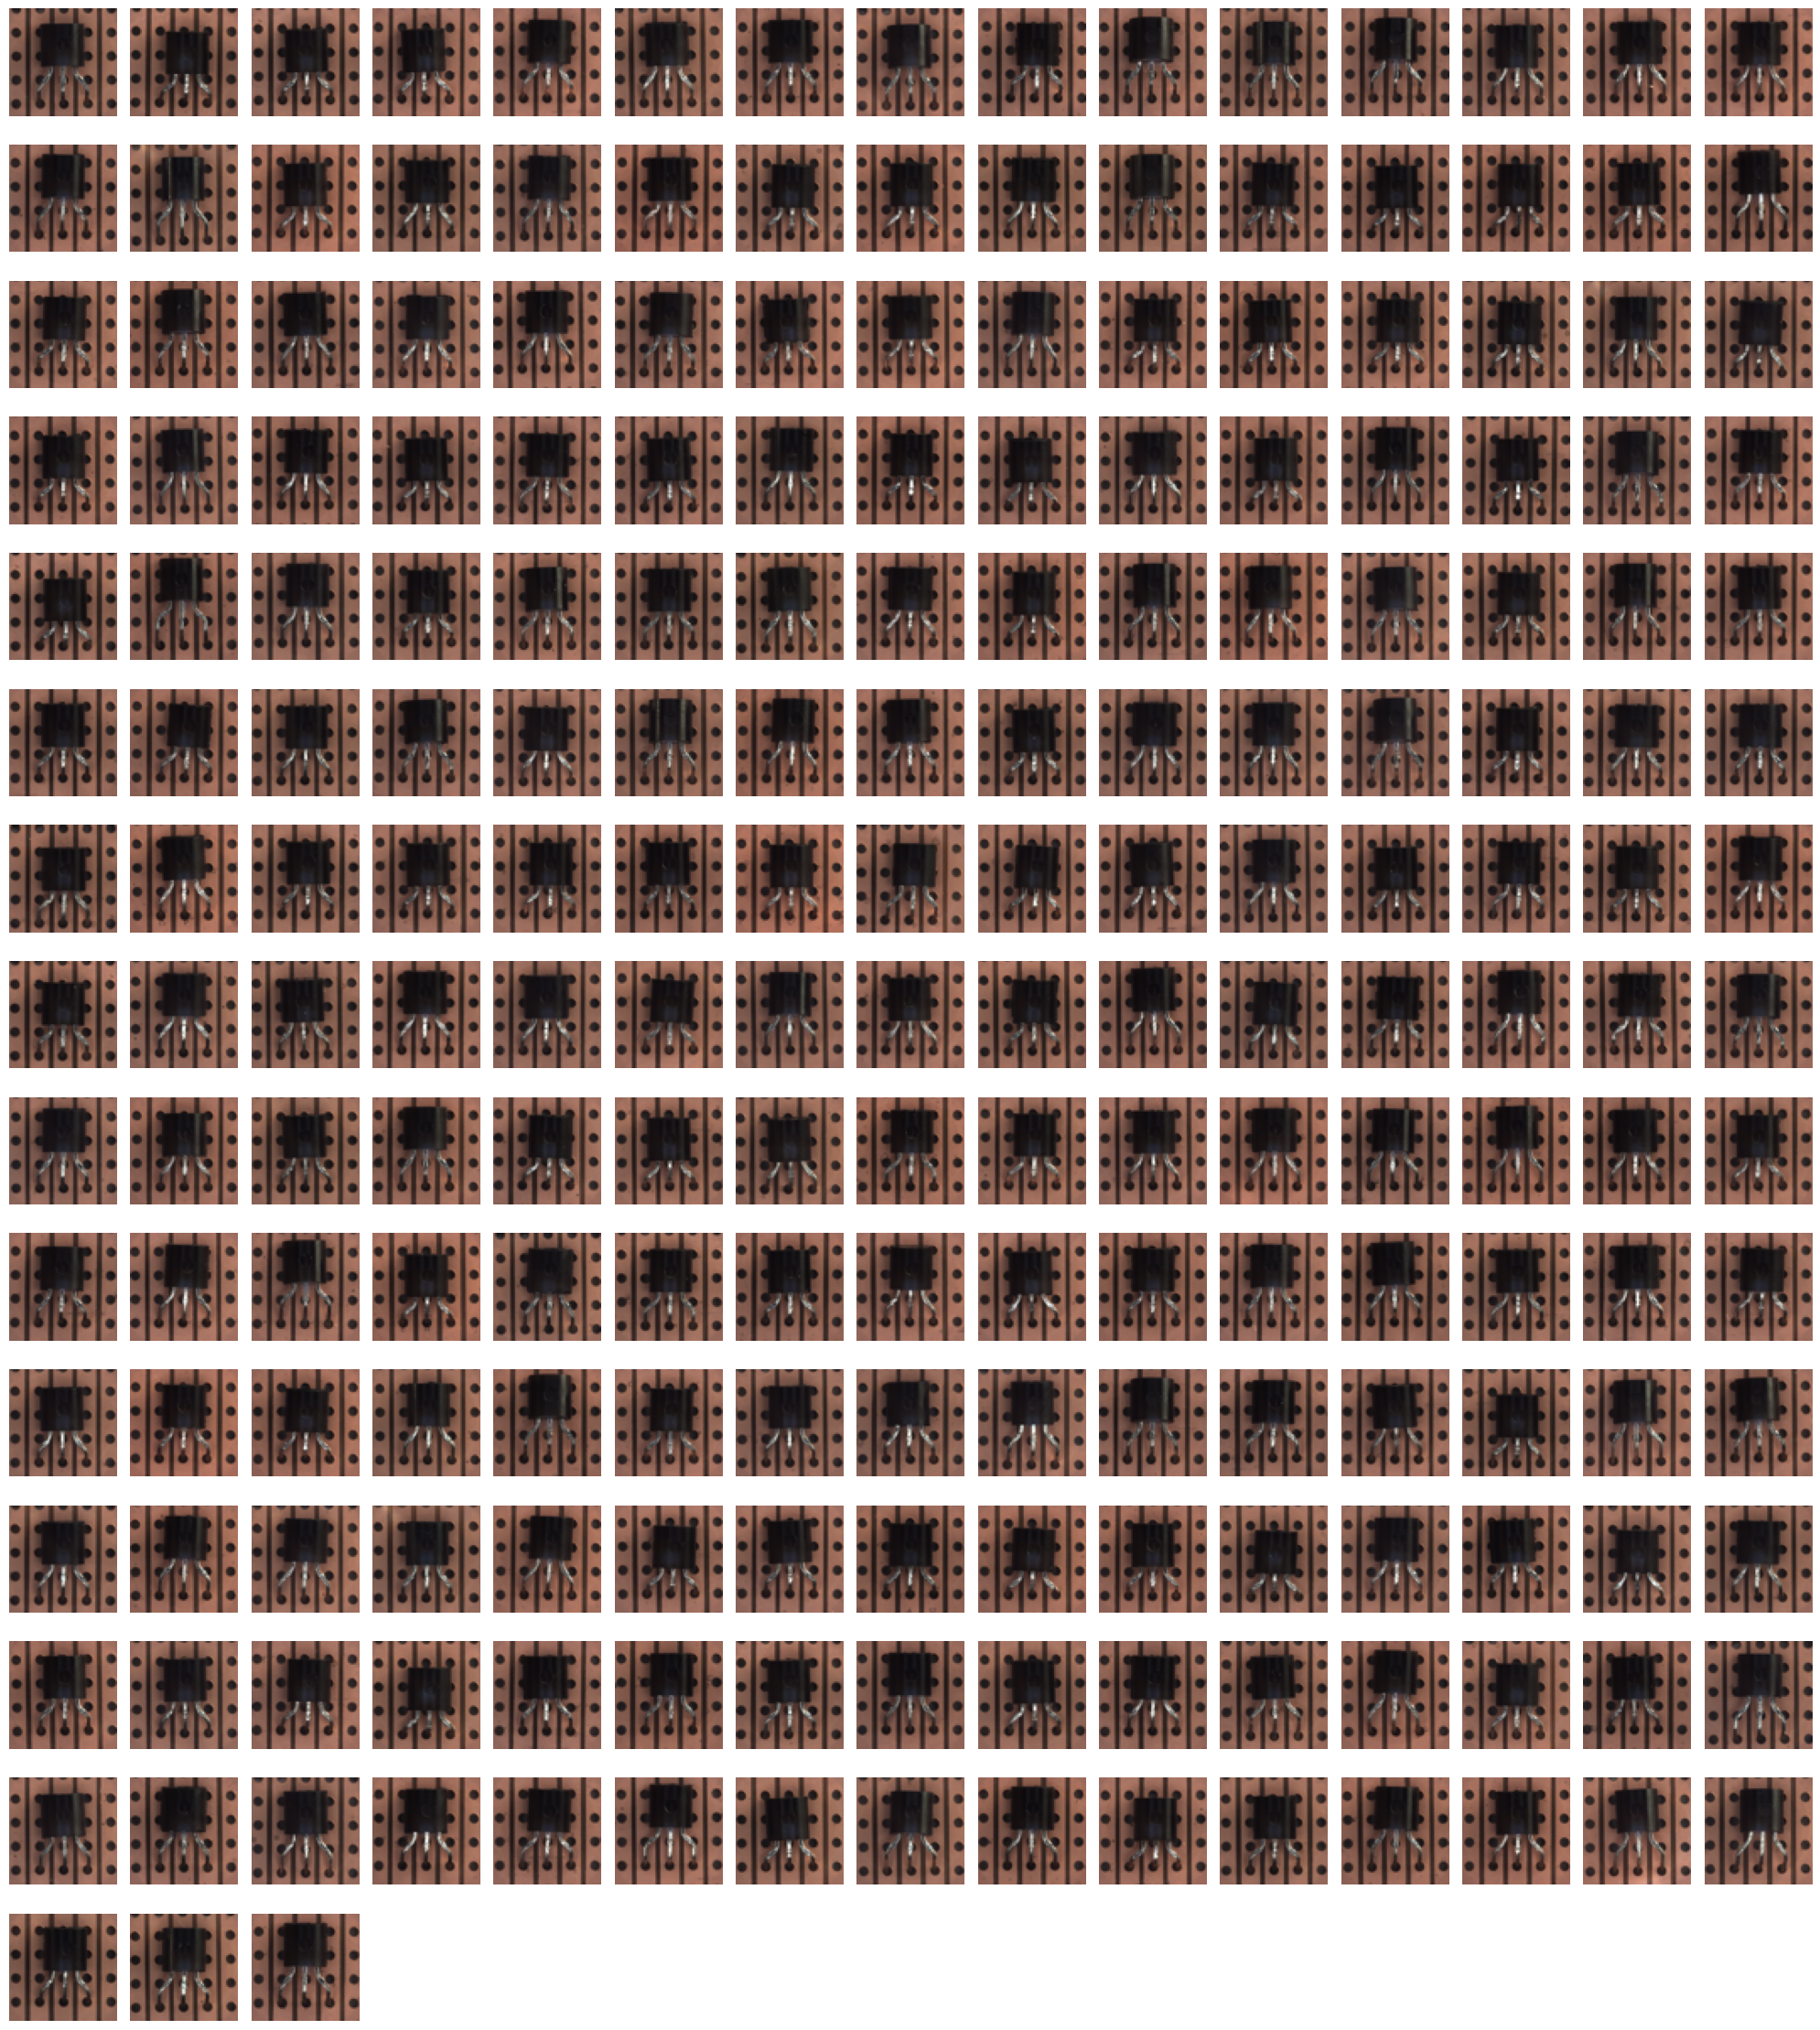

In [9]:
import matplotlib.pyplot as plt
import math
from PIL import Image

def visualize_all_images(df, thumb_size=(64, 64)):
    paths = df['path'].tolist()
    num_images = len(paths)

    # Calculate grid dimensions (approx square)
    cols = 15  # Fixed columns for readability
    rows = math.ceil(num_images / cols)

    plt.figure(figsize=(20, rows * 1.5)) # Adjust height based on rows

    for i, img_path in enumerate(paths):
        # Open and resize for display only (saves display memory)
        with Image.open(img_path) as img:
            img_thumb = img.resize(thumb_size)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img_thumb)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Run the visualization
visualize_all_images(df)

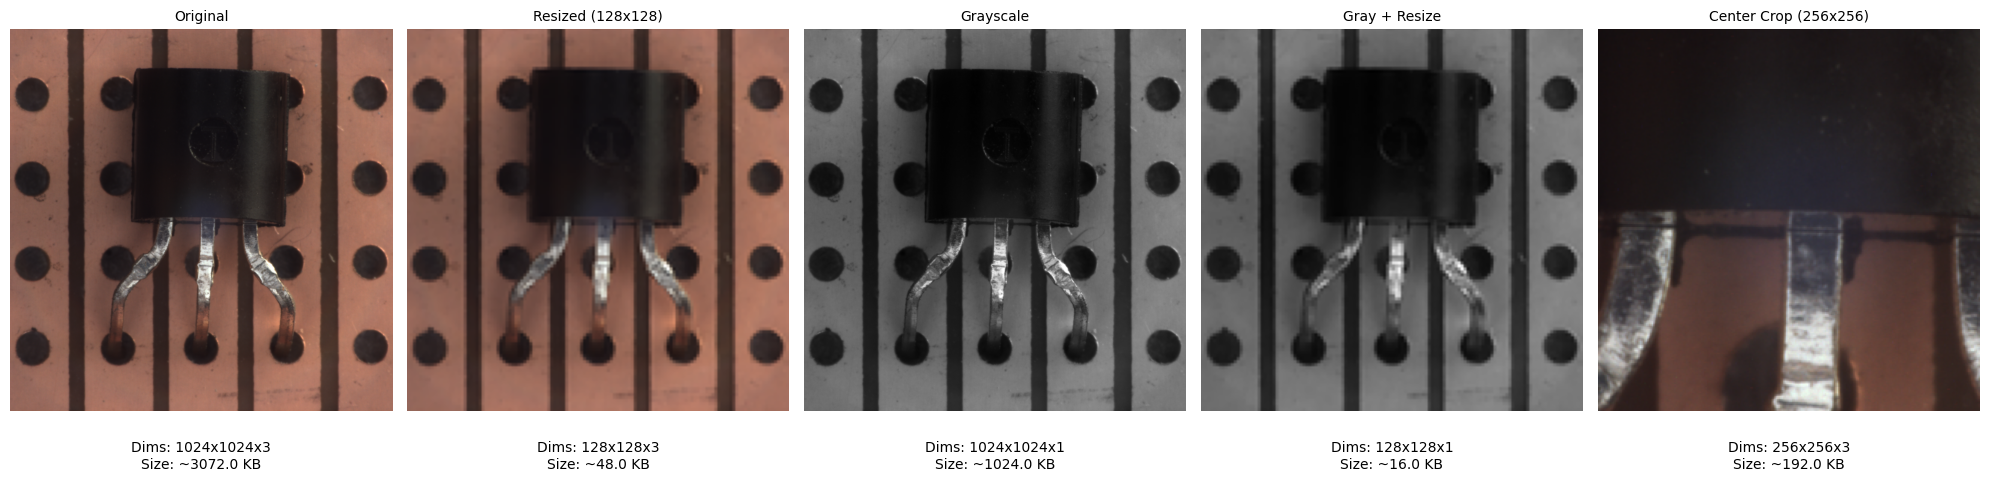

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def experiment_reduction_methods(df, sample_index=0):
    """
    Applies various dimensionality reduction techniques to a single image
    and visualizes the results.
    """
    # Get a sample path from your dataframe
    img_path = df.iloc[sample_index]['path']

    # 1. Load Original
    try:
        original_img = Image.open(img_path)
    except Exception as e:
        print(f"Error loading image: {e}")
        return

    orig_w, orig_h = original_img.size

    # --- Define Transformations ---

    # Method A: Downsampling (Resize) to 128x128
    # Reduces pixel count by factor of (Orig/128)^2
    target_size = (128, 128)
    img_resized = original_img.resize(target_size, Image.Resampling.LANCZOS)

    # Method B: Grayscale
    # Reduces channels from 3 (RGB) to 1 (L)
    img_gray = original_img.convert('L')

    # Method C: Grayscale + Downsample (Maximum Reduction)
    # Combines both A and B
    img_gray_resized = original_img.convert('L').resize(target_size, Image.Resampling.LANCZOS)

    # Method D: Center Crop (Focus on feature, reduce spatial dim)
    # Crops the center 512x512 (or smaller if original is small)
    crop_size = 256
    left = (orig_w - crop_size) / 2
    top = (orig_h - crop_size) / 2
    right = (orig_w + crop_size) / 2
    bottom = (orig_h + crop_size) / 2
    img_cropped = original_img.crop((left, top, right, bottom))

    # --- Plotting ---

    fig, axes = plt.subplots(1, 5, figsize=(20, 5))

    # Helper to clean up axes
    def show_img(ax, img, title, mode='RGB'):
        if mode == 'L':
            ax.imshow(img, cmap='gray')
        else:
            ax.imshow(img)
        ax.set_title(title, fontsize=10)
        ax.axis('off')
        # Calculate rough uncompressed size in RAM (H * W * C)
        w, h = img.size
        c = 1 if img.mode == 'L' else 3
        pixels = w * h * c
        ax.text(0.5, -0.15, f"Dims: {w}x{h}x{c}\nSize: ~{pixels/1024:.1f} KB",
                transform=ax.transAxes, ha='center')

    # 1. Original
    show_img(axes[0], original_img, "Original")

    # 2. Resized
    show_img(axes[1], img_resized, f"Resized ({target_size[0]}x{target_size[1]})")

    # 3. Grayscale
    show_img(axes[2], img_gray, "Grayscale", mode='L')

    # 4. Gray + Resize
    show_img(axes[3], img_gray_resized, "Gray + Resize", mode='L')

    # 5. Cropped
    show_img(axes[4], img_cropped, f"Center Crop ({crop_size}x{crop_size})")

    plt.tight_layout()
    plt.show()

# Run the experiment on the first image in your DF
experiment_reduction_methods(df, sample_index=4)

---

First I thought that using 100 epochs would be good, but the images generated were bad. I decided to increase this to 200, but it was taking ages. So, I reviewed the code and found a mistake. The mistake was when changing the transformation from grey scale to RGB on `transforms.Normalize([0.5], [0.5])` which is probably why I got generated images that were basically noise. Change it to `transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])`

I also decided to reduce to 50 epochs, for quick iteration. The logic here is that in 50 epochs, I should start to see something remotely close to the transistor image, not just a bunch of noise. If that is true, then I can increase to 300 to 500 epochs for full train and some nice edges for the transistors in the generated images.

Just the `transforms.Normalize()` modification wasn't enough and I kept getting noise as generated images, so Gemini suggested that the error could be in how I was doing only the time embedding. The model was "forgetting" the time steps when it got the decoding part. This is apparently called "signal decay". So, I refactored the architecture so that the time step was injected at every block, so the model wouldn't forget. I also added a positional embedding instead of simple linear layers. Still didn't work, so I changed from `BatchNorm2d` to `GroupNorm` in an attempt to normalize not globally, but per sample. I also noticed that Gemini changed my previous `SiLU` to `ReLU`, so I changed it back. `SiLU` should be more appropriate for diffusion problems based on what I read.

First, I had 1000 timesteps, but I thought it was too many. I came to this conclusion by looking at step 500 (halfway) and I saw the image was already pure noise. So, I attempted to reduce this to 50 and see what would happen. I had an "aha!" moment after watching the mini lecture and thought the linear scheduler could be too aggressive for this dataset, so changed it to a cosine scheduler. The cosine scheduler is anchoring the nosing to the number of steps, so 50% of the image should be noise halfway. More time step also makes it easier for the model to learn.

I got tired of the manual implementation and decided to use diffusers to see if the scheduler is a problem or my architecture. Turns out, the manual implementation was good, since I am still getting bad generated images. I think there is some hyperparameter tuning that I am missing, since the loss plot is not that familiar curve, but looks like a linear descent. This implies that the model is not effective in learning stuff.

Didn't work, so with your feedback, I decided to try full training to see what would happen to the loss at later epochs. I also increase the TIMESTEPS to 2000. It worked! 300 epochs gave me a good board, without the transistor. So, I increased to 500 epochs to try to get the transistor to show up. It did, although there is still some noise left. I could increase the epoch even further, but I decided it was "good enough" for a demonstration. I moved on to the grad student part of the assignment and chose to remove the RGB channel, keeping everything else the same.

---

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import math
from diffusers import DDPMScheduler

# --- Configuration ---
IMG_SIZE = 64
BATCH_SIZE = 128
TIMESTEPS = 2000
EPOCHS = 500 # 50 epochs for quick iterations during development
LEARNING_RATE = 1e-4

# Check for GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# --- Dataset Class ---
class TransistorDataset(Dataset):
    def __init__(self, image_paths):
        self.image_paths = image_paths
        # The Grayscale + Resize transform we selected
        self.transform = transforms.Compose([
            transforms.Resize((IMG_SIZE, IMG_SIZE)),
            # transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
            # transforms.Normalize([0,5], [0.5]) # This is for gray scale
        ])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        return self.transform(image)

# Create the dataloader (Assumes 'df' is already loaded from your previous cells)
dataset = TransistorDataset(df['path'].tolist())
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

## ----- GOT TIRED OF MANUAL IMPLEMENTATION, SWITCHING TO DIFFUSERS ------- ##
# def cosine_beta_schedule(timesteps, s=0.008):
#     """
#     cosine schedule as proposed in https://arxiv.org/abs/2102.09672
#     """
#     steps = timesteps + 1
#     x = torch.linspace(0, timesteps, steps)
#     alphas_cumprod = torch.cos(((x / timesteps) + s) / (1 + s) * math.pi * 0.5) ** 2
#     alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
#     betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
#     return torch.clip(betas, 0.0001, 0.9999)

# ## --- OLD WAY, TOO AGREESIVE --- ##
# # # --- Forward Diffusion Schedule ---
# # # Pre-calculate noise schedule
# # beta = torch.linspace(1e-4, 0.02, TIMESTEPS).to(device)
# # alpha = 1.0 - beta
# # alpha_hat = torch.cumprod(alpha, dim=0)
# ## ------------------------------ ##

# # NEW COSINE SCHEDULE
# beta = cosine_beta_schedule(TIMESTEPS).to(device)
# alpha = 1.0 - beta
# alpha_hat = torch.cumprod(alpha, dim=0)

# def forward_diffusion_sample(x_0, t):
#     """ Takes image x_0 and timestep t, returns noisy x_t and the noise """
#     noise = torch.randn_like(x_0)
#     sqrt_alpha_hat_t = torch.sqrt(alpha_hat[t])[:, None, None, None]
#     sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - alpha_hat[t])[:, None, None, None]

#     return sqrt_alpha_hat_t * x_0 + sqrt_one_minus_alpha_hat_t * noise, noise

# print("Configuration and Data Loading restored.")

noise_scheduler = DDPMScheduler(num_train_timesteps=1000, beta_schedule='squaredcos_cap_v2')

Using device: cuda


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import math

class SinusoidalPositionEmbeddings(nn.Module):
    """Encodes the time step t into a dense vector"""
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        return embeddings

class Block(nn.Module):
    """A Conv Block that incorporates the time embedding"""
    def __init__(self, in_ch, out_ch, time_emb_dim, up=False):
        super().__init__()
        self.time_mlp = nn.Linear(time_emb_dim, out_ch)
        if up:
            # Upsample: 2*in_ch because we concatenate skip connections
            self.conv1 = nn.Conv2d(2*in_ch, out_ch, 3, padding=1)
            self.transform = nn.ConvTranspose2d(out_ch, out_ch, 4, 2, 1)
        else:
            # Downsample
            self.conv1 = nn.Conv2d(in_ch, out_ch, 3, padding=1)
            self.transform = nn.Conv2d(out_ch, out_ch, 4, 2, 1)

        self.conv2 = nn.Conv2d(out_ch, out_ch, 3, padding=1)
        self.bnorm1 = nn.GroupNorm(8, out_ch) #Was BatchNorm2d
        self.bnorm2 = nn.GroupNorm(8, out_ch)
        self.relu  = nn.SiLU()

    def forward(self, x, t):
        # First convolution
        h = self.relu(self.bnorm1(self.conv1(x)))

        # Time Injection: Project time to match features and ADD it
        time_emb = self.relu(self.time_mlp(t))
        # Reshape for broadcasting: (Batch, Ch) -> (Batch, Ch, 1, 1)
        time_emb = time_emb[(..., ) + (None, ) * 2]
        h = h + time_emb

        # Second convolution
        h = self.relu(self.bnorm2(self.conv2(h)))

        # Down or Upsample
        return self.transform(h)

class ContextUnet(nn.Module):
    def __init__(self):
        super().__init__()
        image_channels = 3
        down_channels = (64, 128, 256, 512, 1024)
        up_channels = (1024, 512, 256, 128, 64)
        out_dim = 3
        time_emb_dim = 32

        # Time Embedding MLP
        self.time_mlp = nn.Sequential(
            SinusoidalPositionEmbeddings(time_emb_dim),
            nn.Linear(time_emb_dim, time_emb_dim),
            nn.SiLU() # SiLU should be better than ReLU
        )

        # Initial Projection
        self.conv0 = nn.Conv2d(image_channels, down_channels[0], 3, padding=1)

        # Downsample Path
        self.downs = nn.ModuleList([
            Block(down_channels[i], down_channels[i+1], time_emb_dim) \
            for i in range(len(down_channels)-1)
        ])

        # Upsample Path
        self.ups = nn.ModuleList([
            Block(up_channels[i], up_channels[i+1], time_emb_dim, up=True) \
            for i in range(len(up_channels)-1)
        ])

        self.output = nn.Conv2d(up_channels[-1], out_dim, 1)

    def forward(self, x, timestep):
        # Embed Time
        t = self.time_mlp(timestep)

        # Initial Conv
        x = self.conv0(x)

        # Store Skip Connections
        residuals = []
        for down in self.downs:
            x = down(x, t)
            residuals.append(x)

        # Upsample
        for up in self.ups:
            residual = residuals.pop()
            # Concatenate skip connection
            x = torch.cat((x, residual), dim=1)
            x = up(x, t)

        return self.output(x)

---

I tried using grayscale, but it failed. The generated iamges where either fully white or fully black, with very few examples where some sort of transistor was generated. So I moved to a 3 channels, but downsampled.

---

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# --- Helper Functions for Sampling ---

## ---------- DIFFUSERS WAY ----------------- ##
@torch.no_grad()
def generate_images(model, scheduler, num_images=16):
    model.eval()

    # 1. Start from Random Noise
    # Shape: (Batch, Channels, Height, Width)
    image = torch.randn((num_images, 3, IMG_SIZE, IMG_SIZE)).to(device)

    # 2. Set the scheduler's timesteps (Reverse order: 999 -> 0)
    scheduler.set_timesteps(1000)

    # 3. Denoising Loop
    for t in scheduler.timesteps:
        # 3a. Predict Noise
        # We pass the current image and the timestep 't'
        t_batch = torch.full((num_images,), t.item(), device=device, dtype=torch.long)
        model_output = model(image, t_batch)

        # 3b. Compute the Previous Noisier Sample (x_{t-1})
        # The scheduler handles the alphas, betas, and variance logic
        image = scheduler.step(model_output, t, image).prev_sample

    model.train()
    return image

## ---------- MANUAL WAY ----------------- ##
# @torch.no_grad()
# def p_sample_loop(model, shape):
#     device = next(model.parameters()).device

#     # Start from pure noise (x_T)
#     img = torch.randn(shape, device=device)

#     imgs = []

#     # Iterate backwards from T-1 to 0
#     for i in reversed(range(0, TIMESTEPS)):
#         # Create a batch of timestep indices (all = i)
#         t = torch.full((shape[0],), i, device=device, dtype=torch.long)

#         # Denoise one step
#         img = p_sample(model, img, t, i)

#         # Save every 100th step for visualization
#         if i % 100 == 0:
#             imgs.append(img.cpu())

#     # Always append the final clean image
#     imgs.append(img.cpu())
#     return imgs

# @torch.no_grad()
# def p_sample(model, x, t, t_index):
#     """
#     The heart of the reverse process.
#     Equation: x_{t-1} = 1/sqrt(alpha) * (x_t - (beta/sqrt(1-alpha_hat)) * epsilon) + sigma * z
#     """
#     # 1. Get constants for this specific timestep t_index
#     beta_t = beta[t_index]
#     sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - alpha_hat[t_index])
#     sqrt_recip_alpha_t = 1.0 / torch.sqrt(alpha[t_index])

#     # 2. Predict the noise (epsilon) using the model
#     # Model output is epsilon_theta(x_t, t)
#     model_mean = sqrt_recip_alpha_t * (
#         x - beta_t * model(x, t) / sqrt_one_minus_alpha_hat_t
#     )

#     # 3. Add noise (sigma * z) for Langevin dynamics
#     # If t=0 (last step), we don't add noise
#     if t_index == 0:
#         return model_mean
#     else:
#         posterior_variance_t = beta_t # Simple version
#         noise = torch.randn_like(x)
#         return model_mean + torch.sqrt(posterior_variance_t) * noise

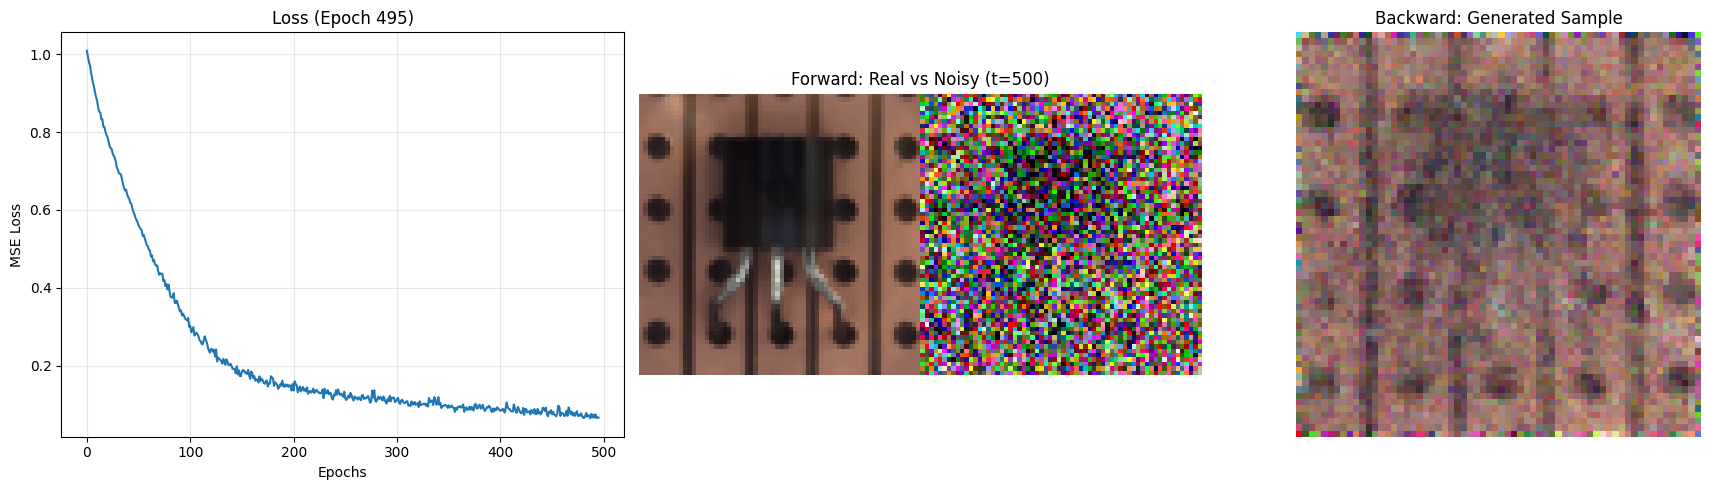

Epoch 495 | Loss: 0.06684
Epoch 496 | Loss: 0.07262
Epoch 497 | Loss: 0.07210
Epoch 498 | Loss: 0.08000
Epoch 499 | Loss: 0.07078
Training Complete.


In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import torch
import numpy as np

# --- 1. Define the Visualization Function ---
def plot_training_progress(epoch, loss_history, model, device, real_batch):
    """
    Plots:
    1. Training Loss Curve
    2. Forward Process (Real Image + Noise)
    3. Backward Process (Model attempting to generate from pure noise)
    """
    model.eval()

    # Create a figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # --- Plot A: Loss Curve ---
    axes[0].plot(loss_history, label='Training Loss')
    axes[0].set_title(f"Loss (Epoch {epoch})")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("MSE Loss")
    axes[0].grid(True, alpha=0.3)

    # --- Plot B: Forward Noising (Sanity Check) ---
    # Take one real image from the batch passed in
    x_0 = real_batch[0:1].to(device)

    # Noise it to t=500 (halfway)
    t_val = 500
    t = torch.full((1,), t_val, device=device, dtype=torch.long)

    # Get variables (assuming global scope from your config)
    noise = torch.randn_like(x_0)
    x_t = noise_scheduler.add_noise(x_0, noise, t)

    # Display Real vs Noised
    # Combine them side-by-side for the plot
    real_disp = (x_0[0].detach().cpu().permute(1, 2, 0) + 1) / 2
    noisy_disp = (x_t[0].detach().cpu().permute(1, 2, 0) + 1) / 2

    combined_forward = torch.cat([real_disp, noisy_disp], dim=1).clamp(0, 1)
    axes[1].imshow(combined_forward)
    axes[1].set_title(f"Forward: Real vs Noisy (t={t_val})")
    axes[1].axis('off')

    # --- Plot C: Backward Denoising (Generation Preview) ---
    # Generate just ONE image to save time
    with torch.no_grad():
        gen_img = generate_images(model, noise_scheduler, num_images=1)
        gen_disp = (gen_img[0].detach().cpu().permute(1, 2, 0) + 1) / 2

    axes[2].imshow(gen_disp.clamp(0, 1))
    axes[2].set_title(f"Backward: Generated Sample")
    axes[2].axis('off')

    plt.tight_layout()
    clear_output(wait=True)
    plt.show()

    model.train() # IMPORTANT: Switch back to train mode!

# --- 2. The Training Loop ---

# Re-initialize everything (optional, ensures fresh start)
model = ContextUnet().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
criterion = nn.MSELoss()
loss_history = []

print("Starting training with live visualization...")

for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0

    # We need a batch for visualization later
    last_batch = None

    ## ----------- DIFFUSERS WAY -------------- ##
    for step, batch_imgs in enumerate(dataloader):
      batch_imgs = batch_imgs.to(device)

      last_batch = batch_imgs

      # 1. Sample Random Timesteps
      # diffusers expects a tensor of ints
      t = torch.randint(0, noise_scheduler.config.num_train_timesteps, (batch_imgs.shape[0],), device=device).long()

      # 2. Create Noise
      noise = torch.randn_like(batch_imgs)

      # 3. Add Noise (Forward Process) using the scheduler
      # This replaces your manual forward_diffusion_sample function
      noisy_imgs = noise_scheduler.add_noise(batch_imgs, noise, t)

      # 4. Predict Noise
      # Note: Your model expects 't', ensure it can handle the format (usually fine)
      noise_pred = model(noisy_imgs, t)

      # 5. Calculate Loss
      loss = criterion(noise_pred, noise)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    ## ---------- MANUAL WAY ----------------- ##
    # for step, batch_imgs in enumerate(dataloader):
    #     batch_imgs = batch_imgs.to(device)
    #     last_batch = batch_imgs # Save for plotting

    #     # 1. Random Timesteps
    #     t = torch.randint(0, TIMESTEPS, (batch_imgs.shape[0],), device=device)

    #     # 2. Add Noise
    #     x_t, noise = forward_diffusion_sample(batch_imgs, t)

    #     # 3. Predict Noise
    #     noise_pred = model(x_t, t)

    #     # 4. Loss & Backprop
    #     loss = criterion(noise_pred, noise)

    #     optimizer.zero_grad()
    #     loss.backward()
    #     optimizer.step()

      epoch_loss += loss.item()

    # Calculate Average Loss
    avg_loss = epoch_loss / len(dataloader)
    loss_history.append(avg_loss)

    # --- VISUALIZE Every 5 Epochs ---
    # We don't do this every epoch because generating the image is slow
    if epoch % 5 == 0:
        plot_training_progress(epoch, loss_history, model, device, last_batch)

    # Print numerical log as fallback
    print(f"Epoch {epoch} | Loss: {avg_loss:.5f}")

print("Training Complete.")

---

Grad student part: I decided to use gray scale as my different method

---

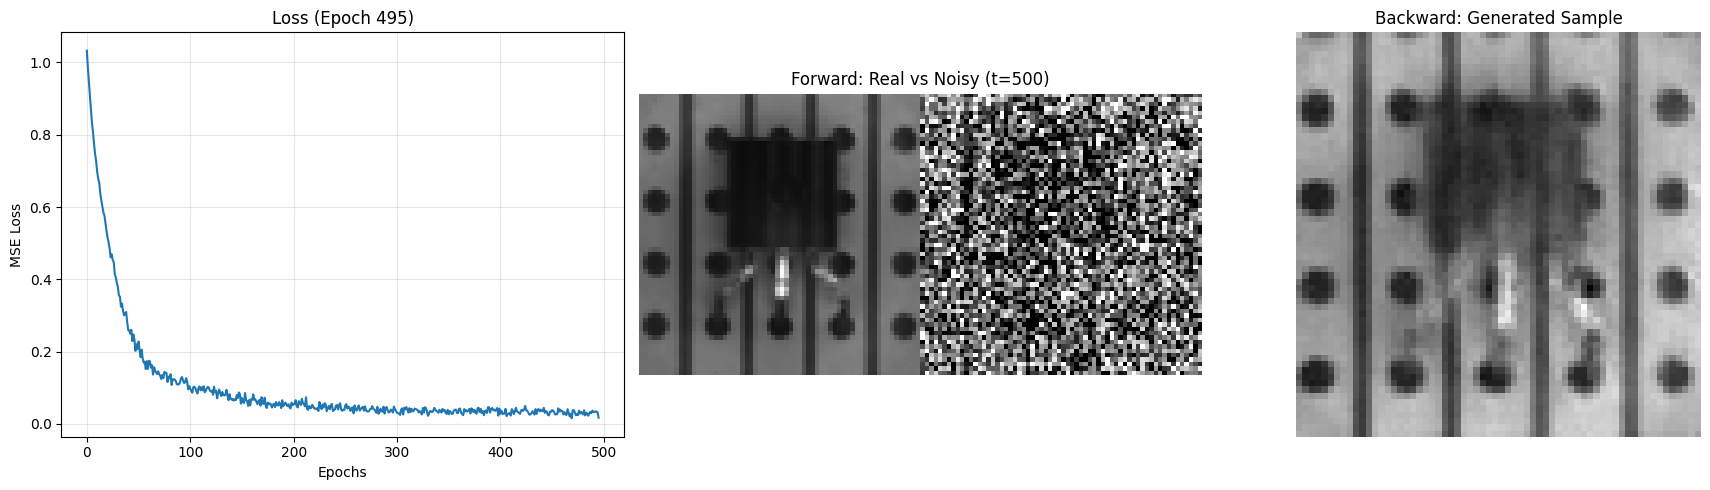

Epoch 495 | Loss: 0.01720
Epoch 496 | Loss: 0.02424
Epoch 497 | Loss: 0.02756
Epoch 498 | Loss: 0.03484
Epoch 499 | Loss: 0.02118
Training Complete.


In [14]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import math
from diffusers import DDPMScheduler

# --- Configuration ---
IMG_SIZE = 64
BATCH_SIZE = 128
TIMESTEPS = 2000
EPOCHS = 500 # 50 epochs for quick iterations during development
LEARNING_RATE = 1e-4

# Check for GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# --- Dataset Class ---
class TransistorDataset(Dataset):
    def __init__(self, image_paths):
        self.image_paths = image_paths
        # The Grayscale + Resize transform we selected
        self.transform = transforms.Compose([
            transforms.Resize((IMG_SIZE, IMG_SIZE)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            # transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
            transforms.Normalize([0.5], [0.5]) # This is for gray scale
        ])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('L') # instead of RGB
        return self.transform(image)

# Create the dataloader (Assumes 'df' is already loaded from your previous cells)
dataset = TransistorDataset(df['path'].tolist())
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

noise_scheduler = DDPMScheduler(num_train_timesteps=1000, beta_schedule='squaredcos_cap_v2')

# Change to the model so it supports gray scale
class ContextUnet(nn.Module):
    def __init__(self):
        super().__init__()
        image_channels = 1
        down_channels = (64, 128, 256, 512, 1024)
        up_channels = (1024, 512, 256, 128, 64)
        out_dim = 1
        time_emb_dim = 32

        # Time Embedding MLP
        self.time_mlp = nn.Sequential(
            SinusoidalPositionEmbeddings(time_emb_dim),
            nn.Linear(time_emb_dim, time_emb_dim),
            nn.SiLU() # SiLU should be better than ReLU
        )

        # Initial Projection
        self.conv0 = nn.Conv2d(image_channels, down_channels[0], 3, padding=1)

        # Downsample Path
        self.downs = nn.ModuleList([
            Block(down_channels[i], down_channels[i+1], time_emb_dim) \
            for i in range(len(down_channels)-1)
        ])

        # Upsample Path
        self.ups = nn.ModuleList([
            Block(up_channels[i], up_channels[i+1], time_emb_dim, up=True) \
            for i in range(len(up_channels)-1)
        ])

        self.output = nn.Conv2d(up_channels[-1], out_dim, 1)

    def forward(self, x, timestep):
        # Embed Time
        t = self.time_mlp(timestep)

        # Initial Conv
        x = self.conv0(x)

        # Store Skip Connections
        residuals = []
        for down in self.downs:
            x = down(x, t)
            residuals.append(x)

        # Upsample
        for up in self.ups:
            residual = residuals.pop()
            # Concatenate skip connection
            x = torch.cat((x, residual), dim=1)
            x = up(x, t)

        return self.output(x)

# Change to the generation
@torch.no_grad()
def generate_images(model, scheduler, num_images=16):
    model.eval()

    # 1. Start from Random Noise
    # Shape: (Batch, Channels, Height, Width)
    image = torch.randn((num_images, 1, IMG_SIZE, IMG_SIZE)).to(device) # 1 for a single channel

    # 2. Set the scheduler's timesteps (Reverse order: 999 -> 0)
    scheduler.set_timesteps(1000)

    # 3. Denoising Loop
    for t in scheduler.timesteps:
        # 3a. Predict Noise
        # We pass the current image and the timestep 't'
        t_batch = torch.full((num_images,), t.item(), device=device, dtype=torch.long)
        model_output = model(image, t_batch)

        # 3b. Compute the Previous Noisier Sample (x_{t-1})
        # The scheduler handles the alphas, betas, and variance logic
        image = scheduler.step(model_output, t, image).prev_sample

    model.train()
    return image

import matplotlib.pyplot as plt
from IPython.display import clear_output
import torch
import numpy as np

# --- 1. Define the Visualization Function ---
def plot_training_progress(epoch, loss_history, model, device, real_batch):
    """
    Plots:
    1. Training Loss Curve
    2. Forward Process (Real Image + Noise)
    3. Backward Process (Model attempting to generate from pure noise)
    """
    model.eval()

    # Create a figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # --- Plot A: Loss Curve ---
    axes[0].plot(loss_history, label='Training Loss')
    axes[0].set_title(f"Loss (Epoch {epoch})")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("MSE Loss")
    axes[0].grid(True, alpha=0.3)

    # --- Plot B: Forward Noising (Sanity Check) ---
    # Take one real image from the batch passed in
    x_0 = real_batch[0:1].to(device)

    # Noise it to t=500 (halfway)
    t_val = 500
    t = torch.full((1,), t_val, device=device, dtype=torch.long)

    # Get variables (assuming global scope from your config)
    noise = torch.randn_like(x_0)
    x_t = noise_scheduler.add_noise(x_0, noise, t)

    # Display Real vs Noised
    # Combine them side-by-side for the plot
    real_disp = (x_0[0].detach().cpu().permute(1, 2, 0) + 1) / 2
    noisy_disp = (x_t[0].detach().cpu().permute(1, 2, 0) + 1) / 2

    combined_forward = torch.cat([real_disp, noisy_disp], dim=1).clamp(0, 1)
    axes[1].imshow(combined_forward, cmap='gray')
    axes[1].set_title(f"Forward: Real vs Noisy (t={t_val})")
    axes[1].axis('off')

    # --- Plot C: Backward Denoising (Generation Preview) ---
    # Generate just ONE image to save time
    with torch.no_grad():
        gen_img = generate_images(model, noise_scheduler, num_images=1)
        gen_disp = (gen_img[0].detach().cpu().permute(1, 2, 0) + 1) / 2

    axes[2].imshow(gen_disp, cmap='gray')
    axes[2].set_title(f"Backward: Generated Sample")
    axes[2].axis('off')

    plt.tight_layout()
    clear_output(wait=True)
    plt.show()

    model.train() # IMPORTANT: Switch back to train mode!

# --- 2. The Training Loop ---

# Re-initialize everything (optional, ensures fresh start)
model = ContextUnet().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
criterion = nn.MSELoss()
loss_history = []

print("Starting training with live visualization...")

for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0

    # We need a batch for visualization later
    last_batch = None

    ## ----------- DIFFUSERS WAY -------------- ##
    for step, batch_imgs in enumerate(dataloader):
      batch_imgs = batch_imgs.to(device)

      last_batch = batch_imgs

      # 1. Sample Random Timesteps
      # diffusers expects a tensor of ints
      t = torch.randint(0, noise_scheduler.config.num_train_timesteps, (batch_imgs.shape[0],), device=device).long()

      # 2. Create Noise
      noise = torch.randn_like(batch_imgs)

      # 3. Add Noise (Forward Process) using the scheduler
      # This replaces your manual forward_diffusion_sample function
      noisy_imgs = noise_scheduler.add_noise(batch_imgs, noise, t)

      # 4. Predict Noise
      # Note: Your model expects 't', ensure it can handle the format (usually fine)
      noise_pred = model(noisy_imgs, t)

      # 5. Calculate Loss
      loss = criterion(noise_pred, noise)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      epoch_loss += loss.item()

    # Calculate Average Loss
    avg_loss = epoch_loss / len(dataloader)
    loss_history.append(avg_loss)

    # --- VISUALIZE Every 5 Epochs ---
    # We don't do this every epoch because generating the image is slow
    if epoch % 5 == 0:
        plot_training_progress(epoch, loss_history, model, device, last_batch)

    # Print numerical log as fallback
    print(f"Epoch {epoch} | Loss: {avg_loss:.5f}")

print("Training Complete.")

---

After many failed attempts, I decided to do a few sanity checks on my data to make sure I am passing the correct thing to the network. Kept the code for future refenrece. It will need some modifications to run because I changed to diffusers scheduler

---

In [ ]:
# import torch
# import matplotlib.pyplot as plt

# def visualize_training_step(model, dataloader, device, diffusion_vars):
#     """
#     Runs a single forward pass and visualizes:
#     1. Original Image (x_0)
#     2. Noisy Image (x_t)
#     3. Actual Noise (epsilon)
#     4. Predicted Noise (epsilon_theta)
#     5. Predicted Reconstruction (x_0 predicted from x_t and epsilon_theta)
#     """
#     model.eval()

#     # 1. Get a single batch
#     try:
#         batch = next(iter(dataloader))
#     except StopIteration:
#         # Handle case where dataloader is exhausted
#         dataloader_iter = iter(dataloader)
#         batch = next(dataloader_iter)

#     x_0 = batch.to(device)

#     # 2. Pick a fixed timestep (t=500, halfway destroyed)
#     t_val = 500
#     t = torch.full((x_0.shape[0],), t_val, device=device, dtype=torch.long)

#     # 3. Get diffusion constants for this timestep
#     # We use the dictionary passed in to avoid global scope issues
#     alpha_hat = diffusion_vars['alpha_hat'].to(device)

#     sqrt_alpha_hat_t = torch.sqrt(alpha_hat[t])[:, None, None, None]
#     sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - alpha_hat[t])[:, None, None, None]

#     # 4. Add Noise (Forward Diffusion)
#     noise = torch.randn_like(x_0)
#     x_t = sqrt_alpha_hat_t * x_0 + sqrt_one_minus_alpha_hat_t * noise

#     # 5. Predict Noise
#     with torch.no_grad():
#         predicted_noise = model(x_t, t)

#     # 6. Calculate Predicted x_0 (Reconstruction)
#     # Formula: x_0 = (x_t - sqrt(1 - alpha_hat) * predicted_noise) / sqrt(alpha_hat)
#     pred_x0 = (x_t - sqrt_one_minus_alpha_hat_t * predicted_noise) / sqrt_alpha_hat_t

#     # --- PLOTTING ---
#     fig, axes = plt.subplots(1, 5, figsize=(20, 5))

#     def prep(img):
#         # Move to CPU, detach, un-normalize (-1,1 -> 0,1), clamp
#         img = img[0].detach().cpu()
#         img = (img + 1) / 2
#         return img.clamp(0, 1).permute(1, 2, 0).numpy()

#     def prep_noise(img):
#         # Noise is centered at 0, shift/scale for visibility
#         img = img[0].detach().cpu()
#         return ((img - img.min()) / (img.max() - img.min())).permute(1, 2, 0).numpy()

#     # 1. Original
#     axes[0].imshow(prep(x_0))
#     axes[0].set_title("1. Original Image")

#     # 2. Noisy Input
#     axes[1].imshow(prep(x_t))
#     axes[1].set_title(f"2. Noisy Input (t={t_val})")

#     # 3. Actual Noise
#     axes[2].imshow(prep_noise(noise))
#     axes[2].set_title("3. Actual Noise")

#     # 4. Predicted Noise
#     axes[3].imshow(prep_noise(predicted_noise))
#     axes[3].set_title("4. Predicted Noise")

#     # 5. Predicted Reconstruction (The "Ghost")
#     axes[4].imshow(prep(pred_x0))
#     axes[4].set_title("5. Predicted Reconstruction")

#     for ax in axes:
#         ax.axis('off')

#     plt.tight_layout()
#     plt.show()
#     model.train()

# # --- RUN IT ---
# # Ensure 'alpha_hat' matches what you defined in your training setup
# diffusion_vars = {'alpha_hat': alpha_hat}

# visualize_training_step(model, dataloader, device, diffusion_vars)

---

Previously failed run: this one is the one where I was not doing the time and positional embeddings. This led to images that where basically noise.

---

In [ ]:

# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# # --- Helper: Time Embedding Projection ---
# class TimeEmbedding(nn.Module):
#     """ Projects standard time embedding to the target channel dimension """
#     def __init__(self, time_dim, out_dim):
#         super().__init__()
#         self.mlp = nn.Sequential(
#             nn.SiLU(), # SiLU is standard for diffusion
#             nn.Linear(time_dim, out_dim),
#         )

#     def forward(self, t_emb):
#         return self.mlp(t_emb)

# # --- Dynamic nnU-Net ---
# class ConvBlock(nn.Module):
#     def __init__(self, in_ch, out_ch):
#         super().__init__()
#         self.conv = nn.Sequential(
#             nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1),
#             nn.InstanceNorm2d(out_ch, affine=True),
#             nn.LeakyReLU(negative_slope=0.01, inplace=True),
#             nn.Conv2d(out_ch, out_ch, kernel_size=3, padding=1),
#             nn.InstanceNorm2d(out_ch, affine=True),
#             nn.LeakyReLU(negative_slope=0.01, inplace=True)
#         )

#     def forward(self, x):
#         return self.conv(x)

# class DynamicUNet(nn.Module):
#     def __init__(self, input_dim=64, start_filts=64, n_channels=3):
#         super().__init__()

#         # 1. Calculate Architecture Depth
#         # For 64x64, depth=3 means: 64 -> 32 -> 16 -> 8 (Bottleneck)
#         self.depth = int(torch.log2(torch.tensor(input_dim))) - 3

#         # 2. Time Embedding (Standard Fixed Dimension)
#         self.time_dim = start_filts * 4
#         self.time_mlp = nn.Sequential(
#             nn.Linear(1, self.time_dim),
#             nn.GELU(),
#             nn.Linear(self.time_dim, self.time_dim),
#         )

#         self.downs = nn.ModuleList()
#         self.ups = nn.ModuleList()
#         self.pool = nn.MaxPool2d(2, 2)

#         # Store channel counts to ensure decoder mirrors encoder exactly
#         dims = [start_filts * (2**i) for i in range(self.depth)]
#         # e.g. for start=64, depth=3: [64, 128, 256]

#         # --- Encoder ---
#         in_ch = n_channels
#         for dim in dims:
#             self.downs.append(ConvBlock(in_ch, dim))
#             in_ch = dim

#         # --- Bottleneck ---
#         bn_dim = dims[-1] * 2 # Double the last encoder dimension
#         self.bottleneck = ConvBlock(dims[-1], bn_dim)

#         # Projection to inject time into bottleneck
#         self.time_proj = TimeEmbedding(self.time_dim, bn_dim)

#         # --- Decoder ---
#         # Reverse the dims list to go back up: [256, 128, 64]
#         for dim in reversed(dims):
#             # We are upsampling FROM (dim*2) TO (dim)
#             # Input to this block = (dim) from upsample + (dim) from skip = 2*dim
#             self.ups.append(nn.ModuleList([
#                 nn.ConvTranspose2d(dim * 2, dim, 2, stride=2),
#                 ConvBlock(dim * 2, dim)
#             ]))

#         self.final_conv = nn.Conv2d(start_filts, n_channels, kernel_size=1)

#     def forward(self, x, t):
#         # 1. Time Embed
#         t = t.float().unsqueeze(-1)
#         t_emb = self.time_mlp(t)

#         # 2. Encoder
#         skips = []
#         for down in self.downs:
#             x = down(x)
#             skips.append(x)
#             x = self.pool(x)

#         # 3. Bottleneck with Time Injection
#         x = self.bottleneck(x)
#         # Project time to match bottleneck channels and add
#         t_emb_proj = self.time_proj(t_emb)
#         x = x + t_emb_proj[:, :, None, None]

#         # 4. Decoder
#         for i, (up_trans, up_conv) in enumerate(self.ups):
#             x = up_trans(x)

#             # Get matching skip connection
#             skip = skips[-(i+1)]

#             # Safe concatenation (handle slight rounding diffs in size)
#             if x.shape != skip.shape:
#                 x = F.interpolate(x, size=skip.shape[2:])

#             x = torch.cat((skip, x), dim=1)
#             x = up_conv(x)

#         return self.final_conv(x)

# # --- Re-Initialize and Train ---

# model = DynamicUNet(input_dim=IMG_SIZE, start_filts=64, n_channels=3).to(device)
# optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)
# criterion = nn.MSELoss()

# print(f"Model Depth: {model.depth}")
# print(f"Parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
# print("Starting training...")

# loss_history = []

# for epoch in range(EPOCHS):
#     model.train()
#     epoch_loss = 0
#     for step, batch_imgs in enumerate(dataloader):
#         batch_imgs = batch_imgs.to(device)
#         t = torch.randint(0, TIMESTEPS, (batch_imgs.shape[0],), device=device)

#         # Forward process
#         x_t, noise = forward_diffusion_sample(batch_imgs, t)

#         # Predict noise
#         noise_pred = model(x_t, t)

#         # Loss
#         loss = criterion(noise_pred, noise)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         epoch_loss += loss.item()

#     avg_loss = epoch_loss / len(dataloader)
#     loss_history.append(avg_loss)

#     if epoch % 10 == 0:
#         print(f"Epoch {epoch} | Loss: {avg_loss:.5f}")

# # Save
# torch.save(model.state_dict(), "diffusion_nnunet_transistor_fixed.pth")
# print("Training Complete & Model Saved.")

# plt.plot(loss_history)
# plt.title("nnU-Net Style Training Loss")
# plt.show()